In [ ]:
import os
import multiprocessing

# get the number of CPU cores
a = multiprocessing.cpu_count()
print(a)

# restrict the number of CPU cores to be used by joblib
os.environ['LOKY_MAX_CPU_COUNT'] = str(a // 2)

8


In [2]:
import torch as th
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = th.utils.data.DataLoader(dataset=train_dataset, batch_size=60000, shuffle=True)
test_loader = th.utils.data.DataLoader(dataset=test_dataset, batch_size=10000, shuffle=False)

print("Number of training samples:", len(train_dataset))
print("Number of testing samples:", len(test_dataset))

Number of training samples: 60000
Number of testing samples: 10000


k = 1 Test accuracy: 0.9631
k = 2 Test accuracy: 0.954
k = 3 Test accuracy: 0.9633
k = 4 Test accuracy: 0.9607
k = 5 Test accuracy: 0.9618
k = 6 Test accuracy: 0.961
k = 7 Test accuracy: 0.9615
k = 8 Test accuracy: 0.9594
k = 9 Test accuracy: 0.9597
k = 10 Test accuracy: 0.9588


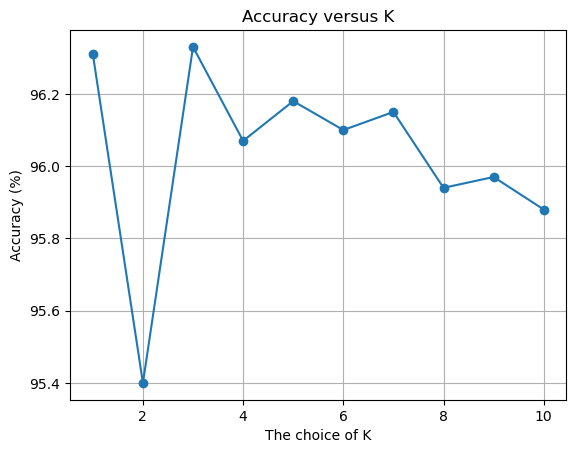

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for train_data, train_labels in train_loader:
    train_data = train_data.view(train_data.size(0), -1)
    train_labels = train_labels

for test_data, test_labels in test_loader:
    test_data = test_data.view(test_data.size(0), -1)
    test_labels = test_labels

accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, p=1)  # p=1 denotes Manhattan distance(SAD)
    
    knn.fit(train_data, train_labels)
    
    accuracy = knn.score(test_data, test_labels)
    accuracies.append(accuracy * 100)
    print("k =", k, "Test accuracy:", accuracy)

plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('The choice of K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy versus K')
plt.grid(True)
plt.savefig('KNN_accuracy_vs_k.png')  # 保存图像为 PNG 文件
plt.show()